In [ ]:
#######################################
Function: 
1. Make a data folder to store generated data for this script.
2. Make a log folder to store depth error and output logs.
3. Make a log folder to store means error and output logs.
4. Make a log folder to store significant means error and output logs.
#######################################

In [ ]:
mkdir -p 00.data
mkdir -p 01.depth/log
mkdir -p 02.means/log
mkdir -p 03.sig_means/log

In [ ]:
#######################################
Function: 
Create a list that contains all of the BAM group names in order of males to females.

Output:
bam_list_males_then_females(file that contains all of the BAMfile names in male to female order)
#######################################

In [3]:
#make male to female list
list_order =[1, 3, 5, 9, 11, 12, 13, 2, 4, 6, 7, 8, 10]
bamdir="/workspace/hramzr/DNAseq_mapping/alignment/04.mark_duplicates/"
f = open("00.data/bam_list_males_then_females", "w")
for i in list_order:
    if i < 10:
        f.write(bamdir+"0"+str(i)+"_group.bam\n")
    else:
        f.write(bamdir+str(i)+"_group.bam\n")
f.close()

In [ ]:
#######################################
Input:
nz_trevally.fasta(reference sequence)

Function: 
Index the reference sequence in order to generate VCF data from it with freebayes later on.

Output:
nz_trevally.fai(indexed reference sequence)
#######################################

In [1]:
REF=/workspace/hramzr/nz_trevally.fasta 
head ${REF}
REFAI=${REF}.fai

>trevally000001 dna:superscaffold superscaffold:1:trevally000001:1:1512:1
CTACCTTTATTTTGAAGGAGCTTCGGTCTATCTGCACTTTAATCCAATCAGACTGATGAT
CTATGATTCTTCTATAATCTAAAGCGTCTCTGGGACAAACCTCCTCCTTCAGAGTCGACA
GAACAAAGAGGAAATTAGAAATGACGGGTTTCACTTTCCCACAGCTTCGTGTTTCACTTG
CTGGTTTGTTCTCACACTGACACTCACACACTGTCCCCTGCAGGCTTCCATAGATAATCT
GTGGGCGACCGTCTGCGTCTGAATGGACATCAGTGTGGTTTAACACACACACACACACAC
ACACACACACACACACACACACAGAGGAGACAGAGAAACGCTGACGGACTCAAACCAGCG
TCTGAACCAGGTCACAACAGAGGGAGGAGACACACACACATTTTAACAGGTCAATAAAAA
CACAAGAGAGAAGTCTGATAGAGGAGGAAACACGGCGTCTGTCTCTGCTGCTGCTGAGGG
GAGGACTGGGTTCGATCCCCGCTGTCTGACTCTGGATGTGCTCGTCGGTAATTATGTGTA


In [ ]:
#######################################
Input:
nz_trevally.fai(indexed reference sequence)

Function: 
Filter the scaffolds on having a minimum size of 3000 to make sure the scaffolds that remain are more reliable.

Output:
scaffold_list.lst(scaffold list with the scaffolds that will be used for depth calculation)
#######################################

In [25]:
cat ${REFAI} | awk '$2>3000 {print $1}'> 00.data/scaffold_list.lst  

In [ ]:
#######################################
Input:
1. bam_list_males_then_females(list with male BAM groups then female BAM groups)
2. scaffold_list.lst(list with scaffolds that have a scaffold size of over 3000)

Function: 
Calculate depth of reads per selected scaffold and scaffold position.

Output:
[scaffold name]_depth files(files with depth per scaffold)
#######################################

In [1]:
#run samtools depth
module load samtools/1.7
while read -r SCAFFOLD
do
    echo "samtools depth \
    -a -f 00.data/bam_list_males_then_females  \
    -r $SCAFFOLD \
    > 01.depth/${SCAFFOLD}_depth"
done < 00.data/scaffold_list.lst | asub -j depth

Job <38748> is submitted to default queue <normal>.


In [ ]:
#######################################
Function: 
Run the Means_pvalues script in order to calculate the mean p_values for a defined base region.
#######################################

In [5]:
module load R/3.4.3 
bsub -n 8 -e Rerror.err "Rscript Means_pvalues.r"

Job <156210> is submitted to default queue <normal>.


In [ ]:
#######################################
Input:
files ending in *means(files that contain the mean -log10P values for depth of a defined base region)

Function: 
Filter the mean files on a defined threshold(-log10P of 4.5 here), in order to get the stronger results for analysis.

Output:
minus_log10P_greater_than_3_[scaffold name](files per scaffold only containing regions with a -log10P of higher than 4.5)
#######################################

In [1]:
library(data.table)
library(dplyr)
filenames <- list.files(path="02.means", pattern="*means", full.names = TRUE)
#filter files for 500 window pos
library(data.table)
library(dplyr)
filenames <- list.files(path="02.means", pattern="*means", full.names = TRUE)
find_high_logP <- function(file){
    DT <- fread(file)
    scaffold=gsub("02.means/ "," ",file)
    scaffold=gsub("02.means/", "", scaffold)
    scaffold=gsub("_means", "", scaffold)
    scaffold=gsub(" ", "", scaffold)
    high <- filter(DT,minus_log10_P>4.5) %>% mutate(Scaffold=scaffold)

    write.table(high, file = paste("03.sig_means/minus_log10P_greater_than_3_",scaffold,sep=""), quote = FALSE, sep = " ",  row.names = FALSE, col.names=FALSE)
}

lapply(filenames,find_high_logP)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[[16]]
NULL

[[17]]
NULL

[[18]]
NULL

[[19]]
NULL

[[20]]
NULL

[[21]]
NULL

[[22]]
NULL

[[23]]
NULL

[[24]]
NULL

[[25]]
NULL

[[26]]
NULL

[[27]]
NULL

[[28]]
NULL

[[29]]
NULL

[[30]]
NULL

[[31]]
NULL

[[32]]
NULL

[[33]]
NULL

[[34]]
NULL

[[35]]
NULL

[[36]]
NULL

[[37]]
NULL

[[38]]
NULL

[[39]]
NULL

[[40]]
NULL

[[41]]
NULL

[[42]]
NULL

[[43]]
NULL

[[44]]
NULL

[[45]]
NULL

[[46]]
NULL

[[47]]
NULL

[[48]]
NULL

[[49]]
NULL

[[50]]
NULL

[[51]]
NULL

[[52]]
NULL

[[53]]
NULL

[[54]]
NULL

[[55]]
NULL

[[56]]
NULL

[[57]]
NULL

[[58]]
NULL

[[59]]
NULL

[[60]]
NULL

[[61]]
NULL

[[62]]
NULL

[[63]]
NULL

[[64]]
NULL

[[65]]
NULL

[[66]]
NULL

[[67]]
NULL

[[68]]
NULL

[[69]]
NULL

[[70]]
NULL

[[71]]
NULL

[[72]]
NULL

[[73]]
NULL

[[74]]
NULL

[[75]]
NULL

[[76]]
NULL

[[77]]
NULL

[[78]]
NULL

[[79]]
NULL

[[80]]
NULL

[[81]]
NULL

[[82]]
NULL

[[83]]
NULL

[[84]]
NULL

[[85]]
NULL

[[86]]
NULL

[[87]]
NULL

[[88]]
NULL

[[89]]
NULL

[[90]]
NULL

[[91]]
NULL

[[92]]
NULL

[[93]]
NULL

[[94]]
NULL

[[95]]
NULL

[[96]]
NULL

[[97]]
NULL

[[98]]
NULL

[[99]]
NULL

[[100]]
NULL

[[101]]
NULL

[[102]]
NULL

[[103]]
NULL

[[104]]
NULL

[[105]]
NULL

[[106]]
NULL

[[107]]
NULL

[[108]]
NULL

[[109]]
NULL

[[110]]
NULL

[[111]]
NULL

[[112]]
NULL

[[113]]
NULL

[[114]]
NULL

[[115]]
NULL

[[116]]
NULL

[[117]]
NULL

[[118]]
NULL

[[119]]
NULL

[[120]]
NULL

[[121]]
NULL

[[122]]
NULL

[[123]]
NULL

[[124]]
NULL

[[125]]
NULL

[[126]]
NULL

[[127]]
NULL

[[128]]
NULL

[[129]]
NULL

[[130]]
NULL

[[131]]
NULL

[[132]]
NULL

[[133]]
NULL

[[134]]
NULL

[[135]]
NULL

[[136]]
NULL

[[137]]
NULL

[[138]]
NULL

[[139]]
NULL

[[140]]
NULL

[[141]]
NULL

[[142]]
NULL

[[143]]
NULL

[[144]]
NULL

[[145]]
NULL

[[146]]
NULL

[[147]]
NULL

[[148]]
NULL

[[149]]
NULL

[[150]]
NULL

[[151]]
NULL

[[152]]
NULL

[[153]]
NULL

[[154]]
NULL

[[155]]
NULL

[[156]]
NULL

[[157]]
NULL

[[158]]
NULL

[[159]]
NULL

[[160]]
NULL

[[161]]
NULL

[[162]]
NULL

[[163]]
NULL

[[164]]
NULL

[[165]]
NULL

[[166]]
NULL

[[167]]
NULL

[[168]]
NULL

[[169]]
NULL

[[170]]
NULL

[[171]]
NULL

[[172]]
NULL

[[173]]
NULL

[[174]]
NULL

[[175]]
NULL

[[176]]
NULL

[[177]]
NULL

[[178]]
NULL

[[179]]
NULL

[[180]]
NULL

[[181]]
NULL

[[182]]
NULL

[[183]]
NULL

[[184]]
NULL

[[185]]
NULL

[[186]]
NULL

[[187]]
NULL

[[188]]
NULL

[[189]]
NULL

[[190]]
NULL

[[191]]
NULL

[[192]]
NULL

[[193]]
NULL

[[194]]
NULL

[[195]]
NULL

[[196]]
NULL

[[197]]
NULL

[[198]]
NULL

[[199]]
NULL

[[200]]
NULL

[[201]]
NULL

[[202]]
NULL

[[203]]
NULL

[[204]]
NULL

[[205]]
NULL

[[206]]
NULL

[[207]]
NULL

[[208]]
NULL

[[209]]
NULL

[[210]]
NULL

[[211]]
NULL

[[212]]
NULL

[[213]]
NULL

[[214]]
NULL

[[215]]
NULL

[[216]]
NULL

[[217]]
NULL

[[218]]
NULL

[[219]]
NULL

[[220]]
NULL

[[221]]
NULL

[[222]]
NULL

[[223]]
NULL

[[224]]
NULL

[[225]]
NULL

[[226]]
NULL

[[227]]
NULL

[[228]]
NULL

[[229]]
NULL

[[230]]
NULL

[[231]]
NULL

[[232]]
NULL

[[233]]
NULL

[[234]]
NULL

[[235]]
NULL

[[236]]
NULL

[[237]]
NULL

[[238]]
NULL

[[239]]
NULL

[[240]]
NULL

[[241]]
NULL

[[242]]
NULL

[[243]]
NULL

[[244]]
NULL

[[245]]
NULL

[[246]]
NULL

[[247]]
NULL

[[248]]
NULL

[[249]]
NULL

[[250]]
NULL

[[251]]
NULL

[[252]]
NULL

[[253]]
NULL

[[254]]
NULL

[[255]]
NULL

[[256]]
NULL

[[257]]
NULL

[[258]]
NULL

[[259]]
NULL

[[260]]
NULL

[[261]]
NULL

[[262]]
NULL

[[263]]
NULL

[[264]]
NULL

[[265]]
NULL

[[266]]
NULL

[[267]]
NULL

[[268]]
NULL

[[269]]
NULL

[[270]]
NULL

[[271]]
NULL

[[272]]
NULL

[[273]]
NULL

[[274]]
NULL

[[275]]
NULL

[[276]]
NULL

[[277]]
NULL

[[278]]
NULL

[[279]]
NULL

[[280]]
NULL

[[281]]
NULL

[[282]]
NULL

[[283]]
NULL

[[284]]
NULL

[[285]]
NULL

[[286]]
NULL

[[287]]
NULL

[[288]]
NULL

[[289]]
NULL

[[290]]
NULL

[[291]]
NULL

[[292]]
NULL

[[293]]
NULL

[[294]

In [ ]:
#######################################
Input:
depth files

Function: 
1. Count amount of different scaffolds. 
<-- this is just to check what the filter amount yielded in different scaffolds
2. Look at lines per file, these each represent a region with a hit where -log 10p >the defined filter amount used. 
<-- to check region amount yielded
3. Put all the files together in one big file.
<-- to plot them and look at patterns

Output:
sig[variable name based on threshold].txt(file containing all regions and scaffold names that have passed the filter used.)
#######################################

In [1]:
fmdir=/workspace/hramzr/Read_depth/03.sig_means/
#delete all empty files
find  ${fmdir} -type f -size -2b -delete
#count amount of different scaffolds
ls -1q ${fmdir}*depth | wc -l
echo "-------------------"
#look at lines per file, these each represent a region with a hit where -log 10p >3 
wc -l ${fmdir}*depth | awk '{print $1}'
#put together files to scatterplot
# cat ${fmdir}*depth>${fmdir}sig3.txt
# cat ${fmdir}*depth>${fmdir}sig4.txt
# cat ${fmdir}*depth>${fmdir}sig3d5.txt 
# cat ${fmdir}*depth>${fmdir}sig2d5.txt
cat ${fmdir}*depth>${fmdir}sig4d5.txt 
cat ${fmdir}sig4d5.txt | awk '{print $(NF-1)}' | head
rm /workspace/hramzr/Read_depth/03.sig_means/*depth


2
-------------------
6
7
13
5.20043187258101
4.99394098457354
5.05875055960901
4.68517256905792
5.4201552967692
5.26785899739784
5.72549925036175
5.64290355754973
6.327485736467
5.14240084956899


In [ ]:
#######################################
Function: 
1. Look at the amount of regions found with the used threshold.
2. Look at the amount of scaffolds found with the used threshold.
3. Look at the specific scaffold names found with the used threshold.
#######################################

In [13]:
fmdir=/workspace/hramzr/Read_depth/03.sig_means/
cat ${fmdir}sig2d5.txt | awk '{print $NF}' | wc -l
cat ${fmdir}sig2d5.txt | awk '{print $NF}' | sort | uniq | wc -l
cat ${fmdir}sig4.txt | awk '{print $NF}' | sort | uniq 

1566
27
trevally000114_depth
trevally000374_depth
trevally000657_depth
trevally001701_depth
trevally001800_depth


### Notes cell above when minus log 10P>3
- 443 regional hits coming from different scaffolds
- 26 different scaffolds as result
- from -log10P>3

### Notes cell above when minus log 10P>4
- 31 regional hits coming from different scaffolds
- 5 different scaffolds as result
- from -log10P>4

### Notes cell above when minus log 10P>3.5
- 132 regional hits coming from different scaffolds
- 20 different scaffolds as result
- from -log10P>3.5

### Notes cell above when minus log 10P>2.5
- 1566 regional hits coming from different scaffolds
- 27 different scaffolds as result
- from -log10P>2.5

### Notes 

Noticibly about 26 scaffolds consist of the most significant hits, the total scaffolds in the dataset being 443, meaning these are worth looking into.

The strongest results can be traced back to 3 scaffolds, but the hits are not particularily clustered, meaning that there is no significant pattern of a specific position.

which are the following:

- trevally000114_depth
- trevally000374_depth
- trevally000657_depth
- trevally001701_depth
- trevally001800_depth

In [ ]:
#######################################
Input:
Files with filtered regions and scaffolds based on several thresholds.

Function: 
Plot the different hits found with different threshold to look for patterns.

Output:
Visualised plots.
#######################################

Text(0.5,1,'Scatterplot position versus confidence rate')

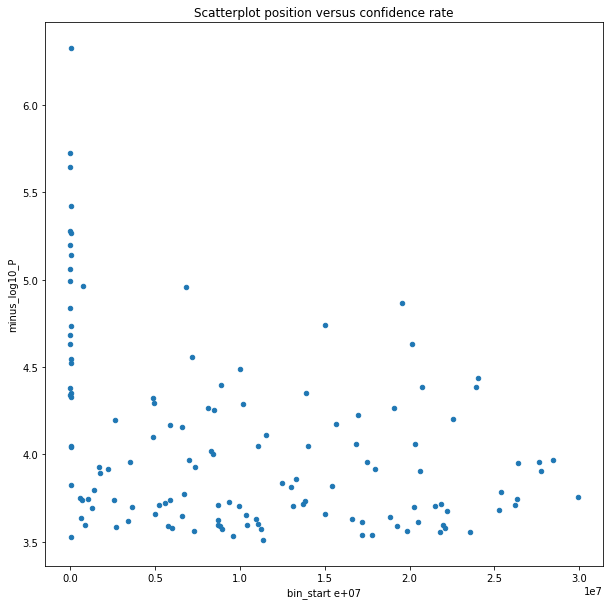

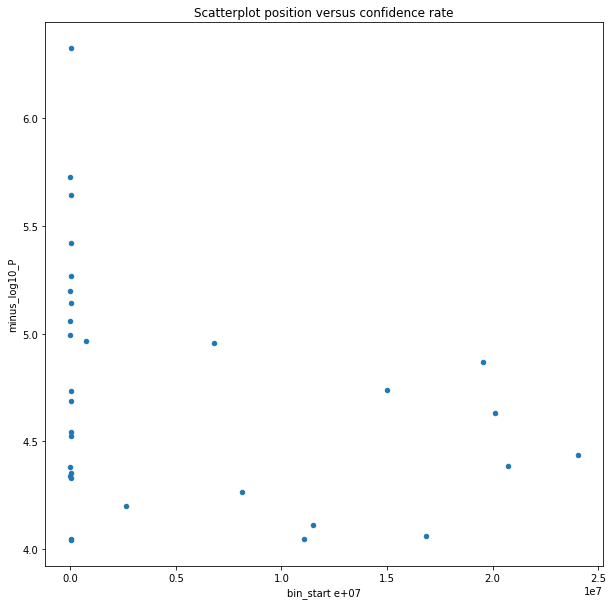

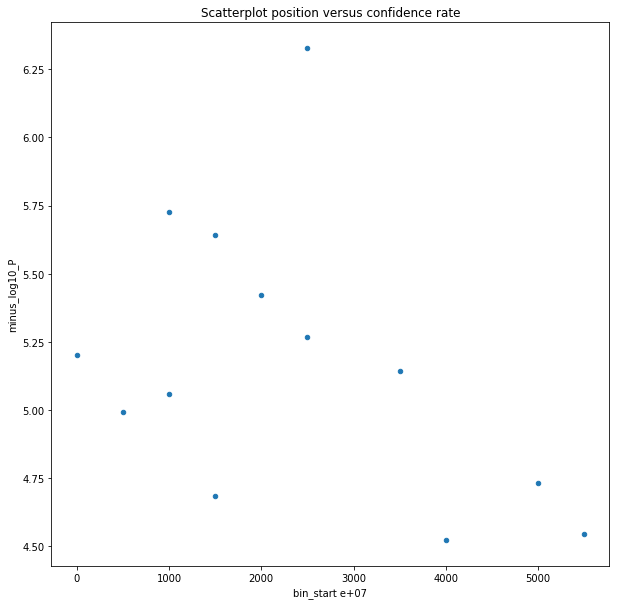

In [2]:
#scatterplot results
import pandas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# #sig2.5
# df  = pd.read_csv("/workspace/hramzr/Read_depth/03.sig_means/sig2d5.txt", delimiter=" ", header=None)
# plot1 = df.plot(kind='scatter',x=0 ,y=16,figsize=(10,10)) # scatter plot
# plot1.set_ylabel("minus_log10_P")
# plot1.set_xlabel("bin_start e+07")
# plot1.set_title("Scatterplot position versus confidence rate")

# #sig3
# df  = pd.read_csv("/workspace/hramzr/Read_depth/03.sig_means/sig3.txt", delimiter=" ", header=None)
# plot2 = df.plot(kind='scatter',x=0 ,y=16,figsize=(10,10)) # scatter plot
# plot2.set_ylabel("minus_log10_P")
# plot2.set_xlabel("bin_start e+07")
# plot2.set_title("Scatterplot position versus confidence rate")
#sig3.5
df  = pd.read_csv("/workspace/hramzr/Read_depth/03.sig_means/sig3d5.txt", delimiter=" ", header=None)
plot3 = df.plot(kind='scatter',x=0 ,y=16,figsize=(10,10)) # scatter plot
plot3.set_ylabel("minus_log10_P")
plot3.set_xlabel("bin_start e+07")
plot3.set_title("Scatterplot position versus confidence rate")
#sig4
df  = pd.read_csv("/workspace/hramzr/Read_depth/03.sig_means/sig4.txt", delimiter=" ", header=None)
plot4 = df.plot(kind='scatter',x=0 ,y=16,figsize=(10,10)) # scatter plot
plot4.set_ylabel("minus_log10_P")
plot4.set_xlabel("bin_start e+07")
plot4.set_title("Scatterplot position versus confidence rate")
# plt.xticks(np.arange(0, 4, 1))
# plt.yticks(np.arange(0, 4, 1))

#sig4.5
df  = pd.read_csv("/workspace/hramzr/Read_depth/03.sig_means/sig4d5.txt", delimiter=" ", header=None)
plot4 = df.plot(kind='scatter',x=0 ,y=16,figsize=(10,10)) # scatter plot
plot4.set_ylabel("minus_log10_P")
plot4.set_xlabel("bin_start e+07")
plot4.set_title("Scatterplot position versus confidence rate")

In [ ]:
#######################################
Function: 
Add all means files together as input for plot with all depth points.
#######################################

In [2]:
# add all means files together as input for plot with all depth points 500b means
mdir=/workspace/hramzr/Read_depth/02.means/

cat ${mdir}*means>${mdir}msdpth

#exclude headers
cat ${mdir}msdpth | grep -v "group">${mdir}msdpthNH

# add all means files together as input for plot with all depth points 100b means
mdir=/powerplant/workspace/hramzr/Read_depth/04.means/

cat ${mdir}*means>${mdir}msdpth

#exclude headers
cat ${mdir}msdpth | grep -v "group">${mdir}msdpthNH

#FOR IGV analysis window 100 4.5 -logP file
mdir=/powerplant/workspace/hramzr/Read_depth/05.sig_means/
cat ${mdir}*depth>${mdir}msdpth